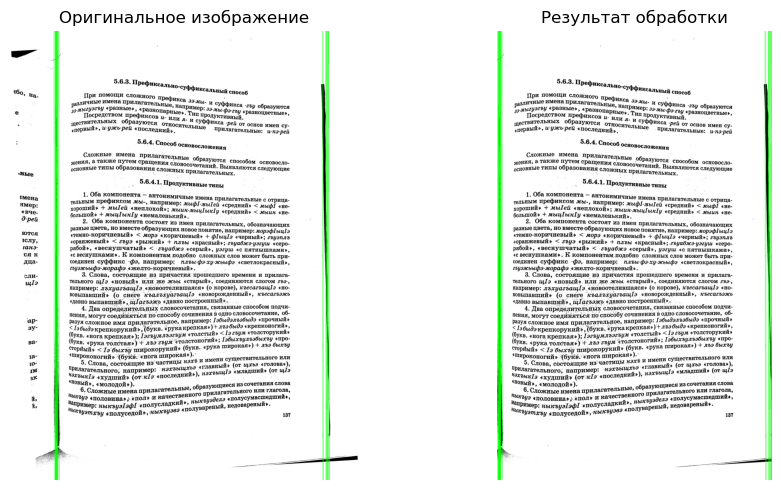

In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


img_dir = 'images/input'
img_filename = 'test_perspective_out.jpg'
img_filepath = os.path.join(img_dir, img_filename)

# Загрузка изображения
image = cv2.imread(img_filepath)

# Преобразование в оттенки серого и применение размытия
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (9, 9), 0)

# Применение алгоритма Кэнни для обнаружения границ
edges = cv2.Canny(blurred, 50, 150)

# Применение преобразования Хафа для обнаружения прямых линий
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# Отбор вертикальных линий
vertical_lines = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
    if np.abs(angle) > 80 and np.abs(angle) < 100:
        vertical_lines.append(line)

# Определение высоты изображения
height = image.shape[0]

# Отрисовка вертикальных линий от самого верха до самого низа страницы
for line in vertical_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, 0), (x2, height), (0, 255, 0), 2)

# Определение наименьшей и наибольшей x-координаты вертикальных линий
min_x = min([min(line[0][0], line[0][2]) for line in vertical_lines])
max_x = max([max(line[0][0], line[0][2]) for line in vertical_lines])

# Обрезка изображения по вертикальным границам
cropped_image = image[:, min_x:max_x]

# Создание субплота с двумя графиками
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Отображение оригинального изображения
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Оригинальное изображение')
axs[0].axis('off')

# Отображение обрезанного изображения
axs[1].imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Результат обработки')
axs[1].axis('off')

# Отображение субплота
plt.tight_layout()
plt.show()


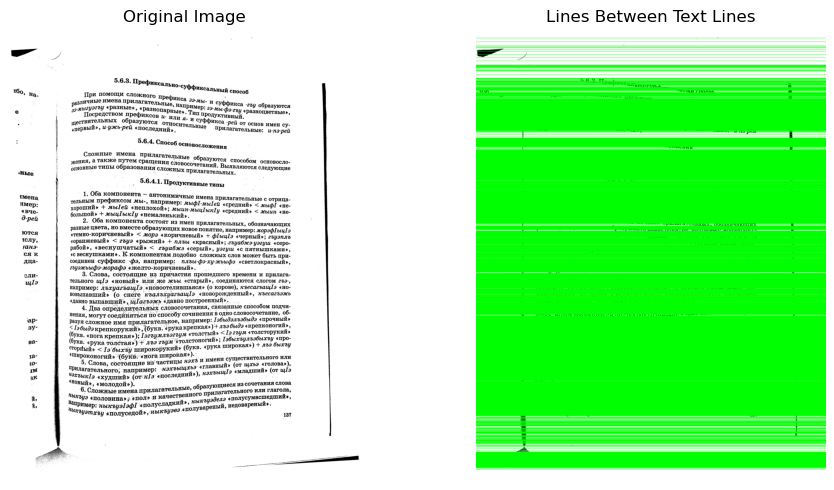

In [13]:
# Загрузка изображения
image = cv2.imread(img_filepath)

# Преобразование изображения в оттенки серого
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Применение адаптивного порогового преобразования для выделения текста
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

# Поиск контуров
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Создание копии изображения для рисования линий
lines_image = image.copy()

# Сортировка контуров по вертикальной координате
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1])

# Построение линий между строками текста
for i in range(1, len(contours)):
    # Получение координат верхней и нижней границ строк
    _, y_upper = cv2.boundingRect(contours[i-1])[:2]
    _, y_lower = cv2.boundingRect(contours[i])[:2]

    # Рисование линии между строками
    y_middle = (y_upper + y_lower) // 2
    cv2.line(lines_image, (0, y_middle), (image.shape[1], y_middle), (0, 255, 0), 2)

# Отображение изображений с помощью matplotlib
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(lines_image, cv2.COLOR_BGR2RGB))
ax[1].set_title('Lines Between Text Lines')
ax[1].axis('off')
plt.tight_layout()
plt.show()

